In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
# Loading the dataset
data = pd.read_csv("/kaggle/input/language-detection/Language Detection.csv")

In [3]:
# value count for each language
data["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [4]:

# separating the independent and dependant features
X = data["Text"]
y = data["Language"]

In [5]:

# converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
    # removing the symbols and numbers
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # converting the text to lower case
    text = text.lower()
    # appending to data_list
    data_list.append(text)

In [6]:
# creating bag of words using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
#train test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [7]:
#model creation and prediction
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
# prediction 
y_pred = model.predict(x_test)
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


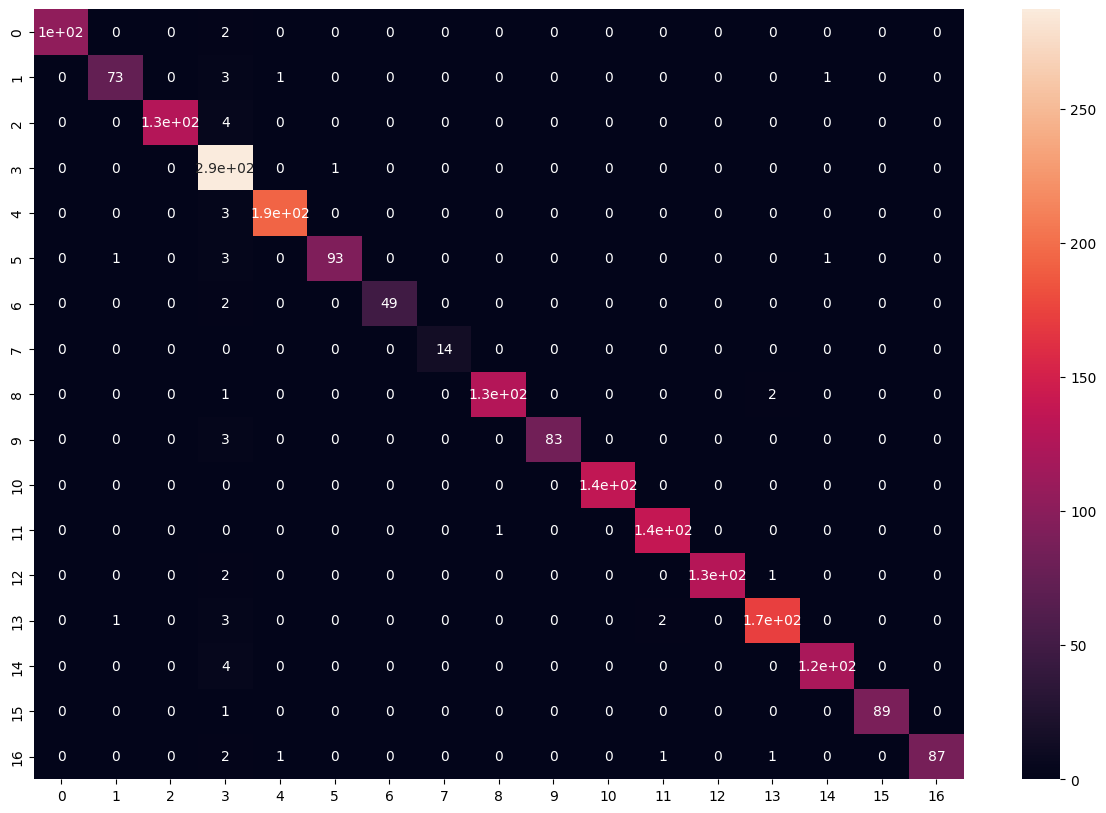

In [8]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [9]:

# function for predicting language
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])

# English
predict("This is a community based knowledge portal for data professionals.")
# French
predict("Bonjour, comment allez-vous ? C'est un test pour la fonction de prédiction de la langue.")  # Hello, how are you? This is a test for the language prediction function.
# Arabic
predict("مرحبا! هذا اختبار للوظيفة التنبؤية للغة. هل يمكن للنموذج تحديد اللغة العربية بشكل صحيح؟")  # Hello! This is a test for the language prediction function. Can the model identify Arabic correctly?
# Spanish
predict("Proporciona un portal de conocimiento basado en la comunidad para profesionales de análisis y ciencia de datos.")  # It provides a community-based knowledge portal for data science professionals.
# Malayalam
predict("കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ ഡാറ്റാ പ്രൊഫഷണലുകൾക്ക് നൽകുന്നു")  # A community-based knowledge portal for data professionals.
# Russian
predict("Привет! Это тест для функции предсказания языка. Может ли модель правильно определить русский язык?")  # Hello! This is a test for the language prediction function. Can the model identify Russian correctly?

The langauge is in English
The langauge is in French
The langauge is in Arabic
The langauge is in Spanish
The langauge is in Malayalam
The langauge is in Russian
